# Convert CIF to JCPDS

* This notebook shows how to calculate a theoretical diffraction pattern  using `pymatgen`.  
* This also aims to show how to read `CIF` files, convert them to `JCPDS`.  
* Note that `ds_jcpds` is differernt from that in `PeakPo`, but it produces readable jcpds for PeakPo.  
* Some `jcpds` files can be downloaded from: https://github.com/SHDShim/JCPDS

In [1]:
%matplotlib inline

## What is CIF file

https://en.wikipedia.org/wiki/Crystallographic_Information_File



In [2]:
%ls ./cif/*.cif

./cif/MgSiO3_bm.cif


In [3]:
%cat ./cif/MgSiO3_bm.cif

data_global
_chemical_name_mineral 'Bridgmanite'
loop_
_publ_author_name
'Horiuchi H'
'Ito E'
'Weidner D J'
_journal_name_full 'American Mineralogist'
_journal_volume 72 
_journal_year 1987
_journal_page_first 357
_journal_page_last 360
_publ_section_title
;
 Perovskite-type MgSiO3: Single-crystal X-ray diffraction study
;
_database_code_amcsd 0001071
_chemical_compound_source 'Synthetic'
_chemical_formula_sum 'Mg Si O3'
_cell_length_a 4.7754
_cell_length_b 4.9292
_cell_length_c 6.8969
_cell_angle_alpha 90
_cell_angle_beta 90
_cell_angle_gamma 90
_cell_volume 162.345
_exptl_crystal_density_diffrn      4.107
_symmetry_space_group_name_H-M 'P b n m'
loop_
_space_group_symop_operation_xyz
  'x,y,z'
  'x,y,1/2-z'
  '-x,-y,1/2+z'
  '1/2+x,1/2-y,1/2+z'
  '1/2-x,1/2+y,1/2-z'
  '1/2-x,1/2+y,z'
  '1/2+x,1/2-y,-z'
  '-x,-y,-z'
loop_
_atom_site_label
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
Mg   0.51410   0.55600   0.25000
Si   0.50000   0.00000   0.50000
O1   0.10280   0.46600   

## What is a JCPDS file

What is lacking in cif?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## What is `pymatgen`?

https://pymatgen.org

In [5]:
import pymatgen as mg
from pymatgen import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

In [6]:
mg.__version__

'2019.4.11'

This works with `pymatgen` version `2019.4.11`.

`ds_jcpds` is written by Dan Shim for making a jcpds file.

In [7]:
%ls ../../peakpo

PeakPo.icns          ds_cake/             peakpo-mac.spec
PeakPo.ico*          ds_jcpds/            peakpo-win.spec
__init__.py          ds_powdiff/          peakpo.py
__main__.py          ds_section/          temporary_pkpo/
__pycache__/         dum.ppss             utils/
build/               error.log            version.py
citation.py          model/               view/
control/             mplstyle/
dist/                peakpo-mac-app.spec


In [8]:
import sys
sys.path.append('../../peakpo/')
sys.path.append('../local_modules/')
import ds_jcpds
import quick_plots as quick

## Input parameters

In [9]:
%ls ./cif/

MgSiO3_bm.cif


In [10]:
fn_cif = "./cif/MgSiO3_bm.cif"
fn_jcpds = './jcpds/MgSiO3-bm.jcpds'
comments_jcpds = "Bridgmanite"

Parameters for the equation of state of bridgmanite.

In [11]:
k0 = 260. # 200.
k0p = 4.00 # 4.
alpha = 3.16e-5 # 1.e-5

In [12]:
wl_xray = 0.3344
xrange = (0,40)

## Read CIF

The `cif` file below was downloaded from American mineralogist crystal structure database.

In [13]:
material = mg.Structure.from_file(fn_cif)

## Get some parameters in CIF

In [14]:
print('Unit-cell volume = ', material.volume)
print('Density = ', material.density)
print('Chemical formula = ', material.formula)

Unit-cell volume =  162.345450996792
Density =  4.107275060713392 g cm^-3
Chemical formula =  Mg4 Si4 O12


In [15]:
lattice = material.lattice
print('Lattice parameters = ', lattice.a, lattice.b, lattice.c, \
      lattice.alpha, lattice.beta, lattice.gamma)
crystal_system = SpacegroupAnalyzer(material).get_crystal_system()
print(crystal_system)

Lattice parameters =  4.7754 4.9292 6.8969 90.0 90.0 90.0
orthorhombic


## Get diffraction pattern

In [16]:
c = XRDCalculator(wavelength=wl_xray)

In [17]:
pattern = c.get_pattern(material, two_theta_range = xrange)

## Extract twotheta, d-sp, int, hkl

In [18]:
pattern.hkls[0][0]['hkl']

(1, 0, 1)

In [19]:
pattern.hkls.__len__()

722

In [20]:
h = []; k = []; l = []
for i in range(pattern.hkls.__len__()):
    h.append(pattern.hkls[i][0]['hkl'][0])
    k.append(pattern.hkls[i][0]['hkl'][1])
    l.append(pattern.hkls[i][0]['hkl'][2])

In [21]:
d_lines = [pattern.x, pattern.d_hkls, pattern.y, h, k, l ]
diff_lines = np.transpose(np.asarray(d_lines))
print(diff_lines[1,:])

[5.55821414 3.44845    8.23481259 0.         0.         2.        ]


## Table output

We can make a nice looking table using the `pandas` package.  `pandas` is more than looking-good table producer.  It is a powerful statistics package popular in data science.

In [22]:
table = pd.DataFrame(data = diff_lines,    # values
    columns=['Two Theta', 'd-spacing', 'intensity', 'h', 'k', 'l'])  # 1st row as the column names
table.head()

,Two Theta,d-spacing,intensity,h,k,l
0,4.881525,3.926131,0.815361,1.0,0.0,1.0
1,5.558214,3.448450,8.234813,0.0,0.0,2.0
2,5.588459,3.429802,20.916571,1.0,1.0,0.0
3,6.241956,3.071022,8.938528,1.0,1.0,1.0
4,7.779938,2.464600,24.497625,0.0,2.0,0.0


## Plot peak positions generated from pymatgen

TypeError: plot_diffpattern() takes 2 positional arguments but 3 were given

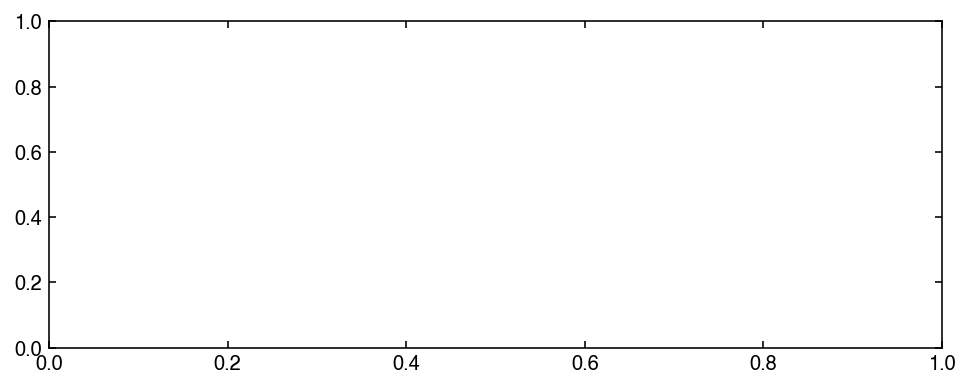

In [23]:
f, ax = plt.subplots(figsize=(8,3))
quick.plot_diffpattern(ax, [0], [0])
ax.vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b');

## Convert to JCPDS

Setup an `jcpds` object from a `cif` file

In [ ]:
material_jcpds = ds_jcpds.JCPDS()
material_jcpds.set_from_cif(fn_cif, k0, k0p, \
                      thermal_expansion=alpha, 
                        two_theta_range=xrange)

Calculate diffraction pattern at a pressure.

In [ ]:
material_jcpds.cal_dsp(pressure = 100.)
dl = material_jcpds.get_DiffractionLines()
tth, inten = material_jcpds.get_tthVSint(wl_xray)

In [ ]:
f, ax = plt.subplots(2, 1, figsize=(7,3), sharex=True)
ax[0].vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b')
ax[1].vlines(tth, 0., inten, color = 'r')
ax[0].set_xlim(7.5,9)

## Save to a JCPDS file

In [ ]:
material_jcpds.write_to_file(fn_jcpds, comments=comments_jcpds)

In [ ]:
%cat {fn_jcpds}

# Read back the written JCPDS for test

In [ ]:
material_test = ds_jcpds.JCPDS(filename = fn_jcpds)

Calculate a pattern at a pressure

In [ ]:
material_test.cal_dsp(pressure = 100.)
material_test.get_DiffractionLines()
tth, inten = material_test.get_tthVSint(wl_xray)

In [ ]:
f = plt.figure(figsize=(8,3))
plt.vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b', label='0 GPa')
plt.vlines(tth, 0., inten, color = 'r', label='100 GPa')
plt.legend();